In [1]:
 #Importing Libraries
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
print('Libraries Imported')

Libraries Imported


In [5]:
df = pd.read_csv('data/input/sample.csv')

In [9]:
df.head()

,OBJECTID *,pointid,grid_code,Vulnerabil,Tropograpy,Soil__Media,Net_Recharge,Impact_Vandose_Zone,Hydrolic_Conductivity,Depth_to_Acquifer,Aquirfer_Media
0,2,3255,3,Medium (78-100),3,4,1,3,1,5,1
1,4,3257,3,Medium (78-100),1,4,1,3,1,5,1
2,5,3258,3,Medium (78-100),2,4,1,3,1,5,1
3,6,3259,3,Medium (78-100),1,4,1,2,1,5,1
4,9,3262,2,Low (47-78),1,4,1,3,1,5,1


In [6]:
df = df.drop(['OBJECTID *'], axis=1) # remove unnecessary columns

In [7]:
df.head()

,pointid,grid_code,Vulnerabil,Tropograpy,Soil__Media,Net_Recharge,Impact_Vandose_Zone,Hydrolic_Conductivity,Depth_to_Acquifer,Aquirfer_Media
0,3255,3,Medium (78-100),3,4,1,3,1,5,1
1,3257,3,Medium (78-100),1,4,1,3,1,5,1
2,3258,3,Medium (78-100),2,4,1,3,1,5,1
3,3259,3,Medium (78-100),1,4,1,2,1,5,1
4,3262,2,Low (47-78),1,4,1,3,1,5,1


In [8]:
# <Null>
df1 = df.replace("<Null>", None)

In [10]:
df1.head(3)

,pointid,grid_code,Vulnerabil,Tropograpy,Soil__Media,Net_Recharge,Impact_Vandose_Zone,Hydrolic_Conductivity,Depth_to_Acquifer,Aquirfer_Media
0,3255,3,Medium (78-100),3,4,1,3,1,5,1
1,3257,3,Medium (78-100),1,4,1,3,1,5,1
2,3258,3,Medium (78-100),2,4,1,3,1,5,1


### Data Cleaning

##### '''As we have imbalanced dataset, so we will use Stratified K-Fold technique where we may use Grid Search / Randomized Search to 
##### optimize the underlying hyperparameters.'''

'''
##### And we know that - 
##### Oversampling: This technique involves increasing the number of instances in the minority class.
##### Hybrid Approaches: Combining oversampling and undersampling techniques can be effective in certain scenarios.   
##### Class Weighting: Assigning different weights to different classes can help balance the impact of class imbalance.   
##### Algorithm Selection: Choosing algorithms that are robust to class imbalance, such as decision trees or ensemble methods 
##### like Random Forest and XGBoost.
'''

In [22]:
df

,pointid,grid_code,Tropograpy,Soil__Media,Net_Recharge,Impact_Vandose_Zone,Hydrolic_Conductivity,Depth_to_Acquifer,Aquirfer_Media
0,3255,3,3,4,1,3,1,5,1
1,3257,3,1,4,1,3,1,5,1
2,3258,3,2,4,1,3,1,5,1
3,3259,3,1,4,1,2,1,5,1
4,3262,2,1,4,1,3,1,5,1
5,3263,3,3,6,1,3,1,5,1
6,3264,2,1,2,1,3,1,5,1
7,3265,3,4,2,1,2,1,5,1
8,3266,2,3,2,1,3,1,5,1
9,3267,3,3,4,1,3,1,5,1


In [11]:
X, y = df.drop(['grid_code'], axis=1), df['grid_code']

In [12]:
print(X.shape)
print(y.shape)

(21, 9)
(21,)


In [13]:
df['pointid'].nunique()

21

In [25]:
IGNORED_COLS_DURING_TRAINING = ['pointid','Vulnerabil']

In [52]:
DRASTIC_COLS = ['Tropograpy', 'Soil__Media', 'Net_Recharge', 'Impact_Vandose_Zone', 'Hydrolic_Conductivity', 'Depth_to_Acquifer', 'Aquirfer_Media']

### Train-Test Splitting

In [48]:
###INFO: `support` is how many samples are in each class.

In [14]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, f1_score

#### ==> Using label binarize technique for ROC curve

#####     Binarize the output (One-vs-Rest)

In [15]:
y_bin = label_binarize(y, classes = np.unique(y))
n_classes = y_bin.shape[1]
print("shape: ",y_bin.shape)
print(f"n_classes: {n_classes}")

shape:  (21, 3)
n_classes: 3


In [16]:
y_bin

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [17]:
# Split data into training and testing sets
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X, y_bin, test_size=0.3, random_state=42, stratify=y_bin)

In [18]:
X_train_bin.shape

(14, 9)

In [19]:
X_test_bin

,pointid,Vulnerabil,Tropograpy,Soil__Media,Net_Recharge,Impact_Vandose_Zone,Hydrolic_Conductivity,Depth_to_Acquifer,Aquirfer_Media
5,3263,Medium (78-100),3,6,1,3,1,5,1
17,3475,High (100-122),3,4,2,2,2,5,1
3,3259,Medium (78-100),1,4,1,2,1,5,1
10,3268,Low (47-78),2,4,1,3,1,5,1
12,3270,Low (47-78),1,4,1,2,1,5,1
9,3267,Medium (78-100),3,4,1,3,1,5,1
11,3269,Medium (78-100),2,6,1,2,1,5,1


In [20]:
y_test_bin

array([[0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1]])

In [36]:
class_labels = np.unique(y)
class_labels

array([1, 2, 3])

In [84]:
# Find the index of the maximum value in each row
ground_truth_indices = np.argmax(y_test_bin, axis=1) # it's binary data & we need to look for 1 value (true)

# Map the indices to the class labels
ground_truth_labels = [int(class_labels[i]) for i in ground_truth_indices]

print(ground_truth_labels)

[3, 1, 3, 2, 2, 3, 3]


### SVM (SVC)

In [21]:
from sklearn.svm import SVC

In [22]:
print(y)
print(y_bin)
print(f"y.shape: {y.shape}")
print(f"y_bin.shape: {y_bin.shape}")
print(n_classes)

0     3
1     3
2     3
3     3
4     2
5     3
6     2
7     3
8     2
9     3
10    2
11    3
12    2
13    3
14    2
15    3
16    3
17    1
18    1
19    1
20    1
Name: grid_code, dtype: int64
[[0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]]
y.shape: (21,)
y_bin.shape: (21, 3)
3


In [85]:
# Train SVC with OneVsRest strategy
svc = OneVsRestClassifier(SVC(kernel='linear', probability=True))
svc.fit(X_train_bin.drop(columns=IGNORED_COLS_DURING_TRAINING), y_train_bin)

y_pred = svc.predict(
    X_test_bin.drop(columns=IGNORED_COLS_DURING_TRAINING)
)

print("SVC Accuracy:", accuracy_score(y_test_bin, y_pred))
print(classification_report(y_test_bin, y_pred))

y_score = svc.decision_function(
    X_test_bin.drop(columns=IGNORED_COLS_DURING_TRAINING)
)

SVC Accuracy: 0.7142857142857143
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.50      0.50      0.50         2
           2       0.75      0.75      0.75         4

   micro avg       0.71      0.71      0.71         7
   macro avg       0.75      0.75      0.75         7
weighted avg       0.71      0.71      0.71         7
 samples avg       0.71      0.71      0.71         7



In [86]:
results = X_test_bin.copy()
results.head()

,pointid,Vulnerabil,Tropograpy,Soil__Media,Net_Recharge,Impact_Vandose_Zone,Hydrolic_Conductivity,Depth_to_Acquifer,Aquirfer_Media
5,3263,Medium (78-100),3,6,1,3,1,5,1
17,3475,High (100-122),3,4,2,2,2,5,1
3,3259,Medium (78-100),1,4,1,2,1,5,1
10,3268,Low (47-78),2,4,1,3,1,5,1
12,3270,Low (47-78),1,4,1,2,1,5,1


In [87]:
test_ground_truth_df = pd.DataFrame(np.array(ground_truth_labels))
test_ground_truth_df 

,0
0,3
1,1
2,3
3,2
4,2
5,3
6,3


In [89]:
# Find the index of the maximum value in each row
predicted_indices = np.argmax(y_pred, axis=1) # it's binary data & we need to look for 1 value (true)

# Map the indices to the class labels
predicted_labels = [int(class_labels[i]) for i in predicted_indices]

print(predicted_labels)

[3, 1, 2, 3, 2, 3, 3]


In [90]:
test_prediction_df = pd.DataFrame(np.array(predicted_labels))
test_prediction_df

,0
0,3
1,1
2,2
3,3
4,2
5,3
6,3


#### Merging prediction and taking the ground truth with location params

In [91]:
df1 = pd.DataFrame({'pointid': results['pointid'].values.flatten().tolist()})
df2 = pd.DataFrame({'vulnerabil': results['Vulnerabil'].values.flatten().tolist()})
df3 = pd.DataFrame({'ground_truth': test_ground_truth_df.values.flatten().tolist()})
df4 = pd.DataFrame({'predicted_label': test_prediction_df.values.flatten().tolist()})

# Concatenate DataFrames side-by-side
merged_df = pd.concat([df1, df2, df3, df4], axis=1)

print(merged_df)

   pointid       vulnerabil  ground_truth  predicted_label
0     3263  Medium (78-100)             3                3
1     3475   High (100-122)             1                1
2     3259  Medium (78-100)             3                2
3     3268      Low (47-78)             2                3
4     3270      Low (47-78)             2                2
5     3267  Medium (78-100)             3                3
6     3269  Medium (78-100)             3                3


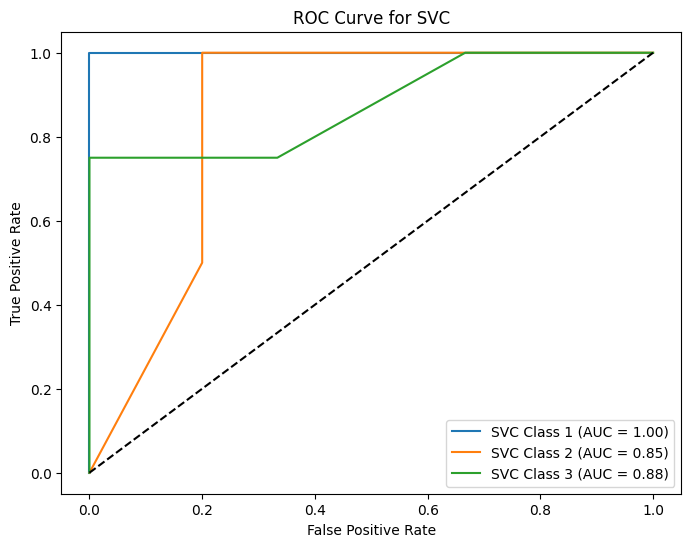

In [92]:
# Plot ROC curves
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"SVC Class {i+1} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for SVC")
plt.legend()
plt.show()

In [93]:
merged_df.to_csv('data/output/svm_result.csv',
          index=False,  # Don't include the index
          sep=',',      # Use comma as the delimiter
          decimal='.',  # Specify the decimal point
          header=True,  # Include the column headers
          encoding='utf-8')  # Specify the encoding

In [55]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.datasets import make_classification

##### ***Sample code with test generated data using make_classification!! :D

X_trainn.shape: (700, 20)
X_testt.shape: (300, 20)
y_trainn.shape: (700,)
y_testt.shape: (300,)
y_testt_bin.shape: (300, 3)
y_score: [[0.19 0.04 0.77]
 [0.8  0.03 0.17]
 [0.09 0.7  0.21]
 [0.62 0.38 0.  ]
 [0.03 0.89 0.08]]


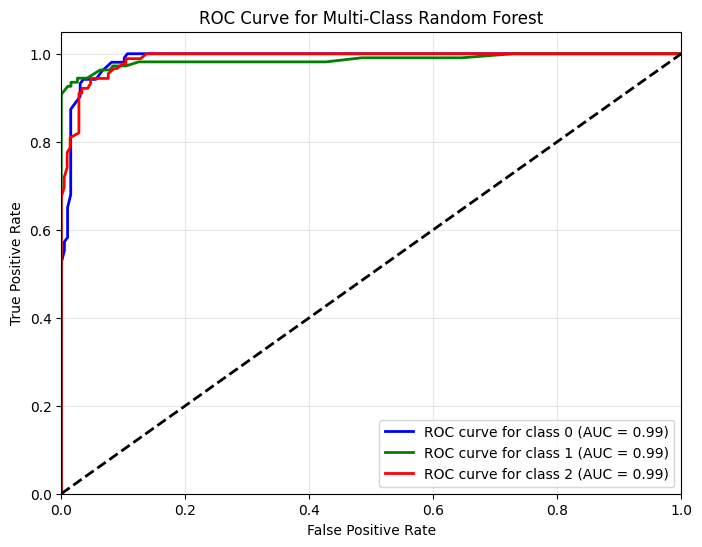

In [56]:
# 1. Create a synthetic multi-class dataset
XX, yy = make_classification(
    n_samples=1000,       # Number of samples
    n_features=20,        # Total number of features
    n_informative=10,     # Number of informative features
    n_redundant=5,        # Number of redundant features
    n_classes=3,          # Number of classes
    n_clusters_per_class=1,  # Number of clusters per class
    random_state=42
)
n_classess = 3  # Number of classes

# Split the dataset
X_trainn, X_testt, y_trainn, y_testt = train_test_split(XX, yy, test_size=0.3, random_state=42)

print(f"X_trainn.shape: {X_trainn.shape}")
print(f"X_testt.shape: {X_testt.shape}")
print(f"y_trainn.shape: {y_trainn.shape}")
print(f"y_testt.shape: {y_testt.shape}")

# Binarize the output (One-vs-Rest) after splitting
y_testt_bin = label_binarize(y_testt, classes=[0, 1, 2])

print(f"y_testt_bin.shape: {y_testt_bin.shape}")

# 2. Train the RandomForest classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_trainn, y_trainn)  # Use 1D y_trainn for training

# 3. Get prediction probabilities for each class
y_score = rf.predict_proba(X_testt)
print(f"y_score: {y_score[:5]}")

# 4. Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classess):
    fpr[i], tpr[i], _ = roc_curve(y_testt_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 5. Plot the ROC curve
plt.figure(figsize=(8, 6))

colors = ['blue', 'green', 'red']
for i in range(n_classess):
    plt.plot(
        fpr[i],
        tpr[i],
        color=colors[i],
        lw=2,
        label=f"ROC curve for class {i} (AUC = {roc_auc[i]:.2f})",
    )

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line (random guess)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multi-Class Random Forest")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

### Wrap RandomForestClassifier with OneVsRestClassifier (using StratifiedKFold & RandomizedSearchCV)

In [58]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [61]:
X_test.head()

,pointid,Vulnerabil,Tropograpy,Soil__Media,Net_Recharge,Impact_Vandose_Zone,Hydrolic_Conductivity,Depth_to_Acquifer,Aquirfer_Media
0,3255,Medium (78-100),3,4,1,3,1,5,1
17,3475,High (100-122),3,4,2,2,2,5,1
15,3273,Medium (78-100),3,4,1,3,1,5,1
1,3257,Medium (78-100),1,4,1,3,1,5,1
8,3266,Low (47-78),3,2,1,3,1,5,1


In [62]:
y_test.head()

0     3
17    1
15    3
1     3
8     2
Name: grid_code, dtype: int64

In [63]:
print(X_train.shape)
print(y_train.shape)

(14, 9)
(14,)


In [64]:
# Create a StratifiedKFold object
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Wrap it in OneVsRestClassifier
ovr = OneVsRestClassifier(rf)

# Define the hyperparameter grid for RandomizedSearchCV
param_dist = {
    "estimator__n_estimators": [50, 100, 200, 300],
    "estimator__max_depth": [None, 10, 20, 30],
    "estimator__min_samples_split": [2, 5, 10],
    "estimator__min_samples_leaf": [1, 2, 4],
}

# RandomizedSearchCV setup
random_search = RandomizedSearchCV(
    estimator = ovr, 
    param_distributions = param_dist, 
    n_iter = 10, 
    scoring = 'accuracy',
    # scoring = 'roc_auc_ovr'
    # cv = 3,
    cv = skf,
    random_state = 42
)

# Fit the model
random_search.fit(X_train.drop(columns=IGNORED_COLS_DURING_TRAINING), y_train)

# Best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

/Users/goava/PERSONAL/Daily-Learning-Resources/Data-Science/venv/lib/python3.11/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'estimator__n_estimators': 200, 'estimator__min_samples_split': 5, 'estimator__min_samples_leaf': 2, 'estimator__max_depth': None}
Best Score: 0.6666666666666666


In [65]:
# Predict
y_pred = random_search.best_estimator_.predict(X_test.drop(columns=IGNORED_COLS_DURING_TRAINING))

# Calculate accuracy + other metrics
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

f1_micro = f1_score(y_test, y_pred, average='micro')
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_weighted = f1_score(y_test, y_pred, average='weighted')

print("F1-score (micro):", f1_micro)
print("F1-score (macro):", f1_macro)
print("F1-score (weighted):", f1_weighted)

Accuracy: 0.7142857142857143
F1-score (micro): 0.7142857142857143
F1-score (macro): 0.6
F1-score (weighted): 0.7142857142857143


In [66]:
# Predict probabilities
y_score = random_search.best_estimator_.predict_proba(X_test.drop(columns=IGNORED_COLS_DURING_TRAINING))
print(f"y_score: {y_score}")
print(f"y_score.shape: {y_score.shape}")

y_score: [[0.07170736 0.31701351 0.61127914]
 [0.65677551 0.14877242 0.19445207]
 [0.07170736 0.31701351 0.61127914]
 [0.04832621 0.58541071 0.36626308]
 [0.06495674 0.33985874 0.59518452]
 [0.07170736 0.31701351 0.61127914]
 [0.12355431 0.40432076 0.47212492]]
y_score.shape: (7, 3)


In [69]:
n_classes = y.nunique()
n_classes

3

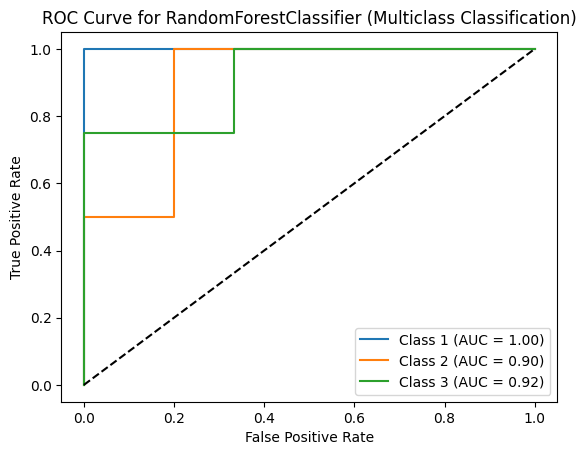

In [70]:
# Compute & plot ROC curve and AUC for each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i+1} (AUC = {roc_auc:.2f})")

# Plot diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for RandomForestClassifier (Multiclass Classification)")
plt.legend()
plt.show()

In [72]:
y_pred

array([3, 1, 3, 2, 3, 3, 3])

In [74]:
# Map the indices to the class labels
predicted_labels = [int(val) for val in y_pred]

print(predicted_labels)

[3, 1, 3, 2, 3, 3, 3]


In [75]:
test_prediction_df = pd.DataFrame(np.array(predicted_labels))
test_prediction_df

,0
0,3
1,1
2,3
3,2
4,3
5,3
6,3


In [76]:
df1 = pd.DataFrame({'pointid': results['pointid'].values.flatten().tolist()})
df2 = pd.DataFrame({'vulnerabil': results['Vulnerabil'].values.flatten().tolist()})
df3 = pd.DataFrame({'ground_truth': test_ground_truth_df.values.flatten().tolist()})
df4 = pd.DataFrame({'predicted_label': test_prediction_df.values.flatten().tolist()})

# Concatenate DataFrames side-by-side
merged_df = pd.concat([df1, df2, df3, df4], axis=1)

print(merged_df)

   pointid       vulnerabil  ground_truth  predicted_label
0     3263  Medium (78-100)             3                3
1     3475   High (100-122)             1                1
2     3259  Medium (78-100)             3                3
3     3268      Low (47-78)             2                2
4     3270      Low (47-78)             2                3
5     3267  Medium (78-100)             3                3
6     3269  Medium (78-100)             3                3


In [79]:
merged_df.to_csv('data/output/rf_classifier_result.csv',
          index=False,  # Don't include the index
          sep=',',      # Use comma as the delimiter
          decimal='.',  # Specify the decimal point
          header=True,  # Include the column headers
          encoding='utf-8')  # Specify the encoding

### --> predict for a new datapoint (sample)

In [ ]:
# Example new data point
new_data_point = np.array([[5.0, 3.0, 1.0, 1.0, 2.0, 2.0, 5.0]])  # Replace with your actual data

# Assuming random_search is a fitted RandomizedSearchCV object
best_rf_model = random_search.best_estimator_  # Access best model

# Predict probabilities and class for RandomForestClassifier
class_probabilities = best_rf_model.predict_proba(new_data_point)
predicted_class = best_rf_model.predict(new_data_point)

print("Predicted Class Probabilities (RandomForest):", class_probabilities)
print("Predicted Class (RandomForest):", predicted_class)

# If using OneVsRestClassifier
class_probabilities_ovr = ovr_model.predict_proba(new_data_point)
predicted_class_ovr = np.argmax(class_probabilities_ovr, axis=1)

print("\nPredicted Class Probabilities (OneVsRest):", class_probabilities_ovr)
print("Predicted Class (OneVsRest):", predicted_class_ovr)